<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/chuongmep/aps-toolkit/blob/dev/APSToolkitPython/Tutorials/05.%20Explore%20Access%20Database%20And%20Query%20Items.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/chuongmep/aps-toolkit/blob/dev/APSToolkitPython/Tutorials/05.%20Explore%20Access%20Database%20And%20Query%20Items.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<table align="left">
  <tr>
    <td>Author(s)</td>
    <td><a href="https://github.com/chuongmep" id="author-link">Chuong Ho</a></td>
    <!-- <td><a href="<your repo>" id="github-link">YourName</a></td> -->
  </tr>
</table>

In [1]:
%pip install aps-toolkit --upgrade

Note: you may need to restart the kernel to use updated packages.


### Import Libraries

In [2]:
from aps_toolkit import Auth
import requests
import os
import sqlite3

## Auth

In [3]:
auth = Auth()
token = auth.auth2leg()

#### Auth Via Google Colab

In [ ]:
# from google.colab import userdata
# client_id = userdata.get('APS_CLIENT_ID')
# client_secret = userdata.get('APS_CLIENT_SECRET')
# auth = Auth(client_id, client_secret)
# token = auth.auth2leg()

## URN

In [4]:
URN = "dXJuOmFkc2sud2lwcHJvZDpmcy5maWxlOnZmLnRfTFFVUDZoU3l5UXo5bm1sTE1FUHc_dmVyc2lvbj02"

## Database Reader

Tutorial : 
- https://github.com/petrbroz/forge-props-service
- https://aps.autodesk.com/blog/accessing-design-metadata-without-viewer


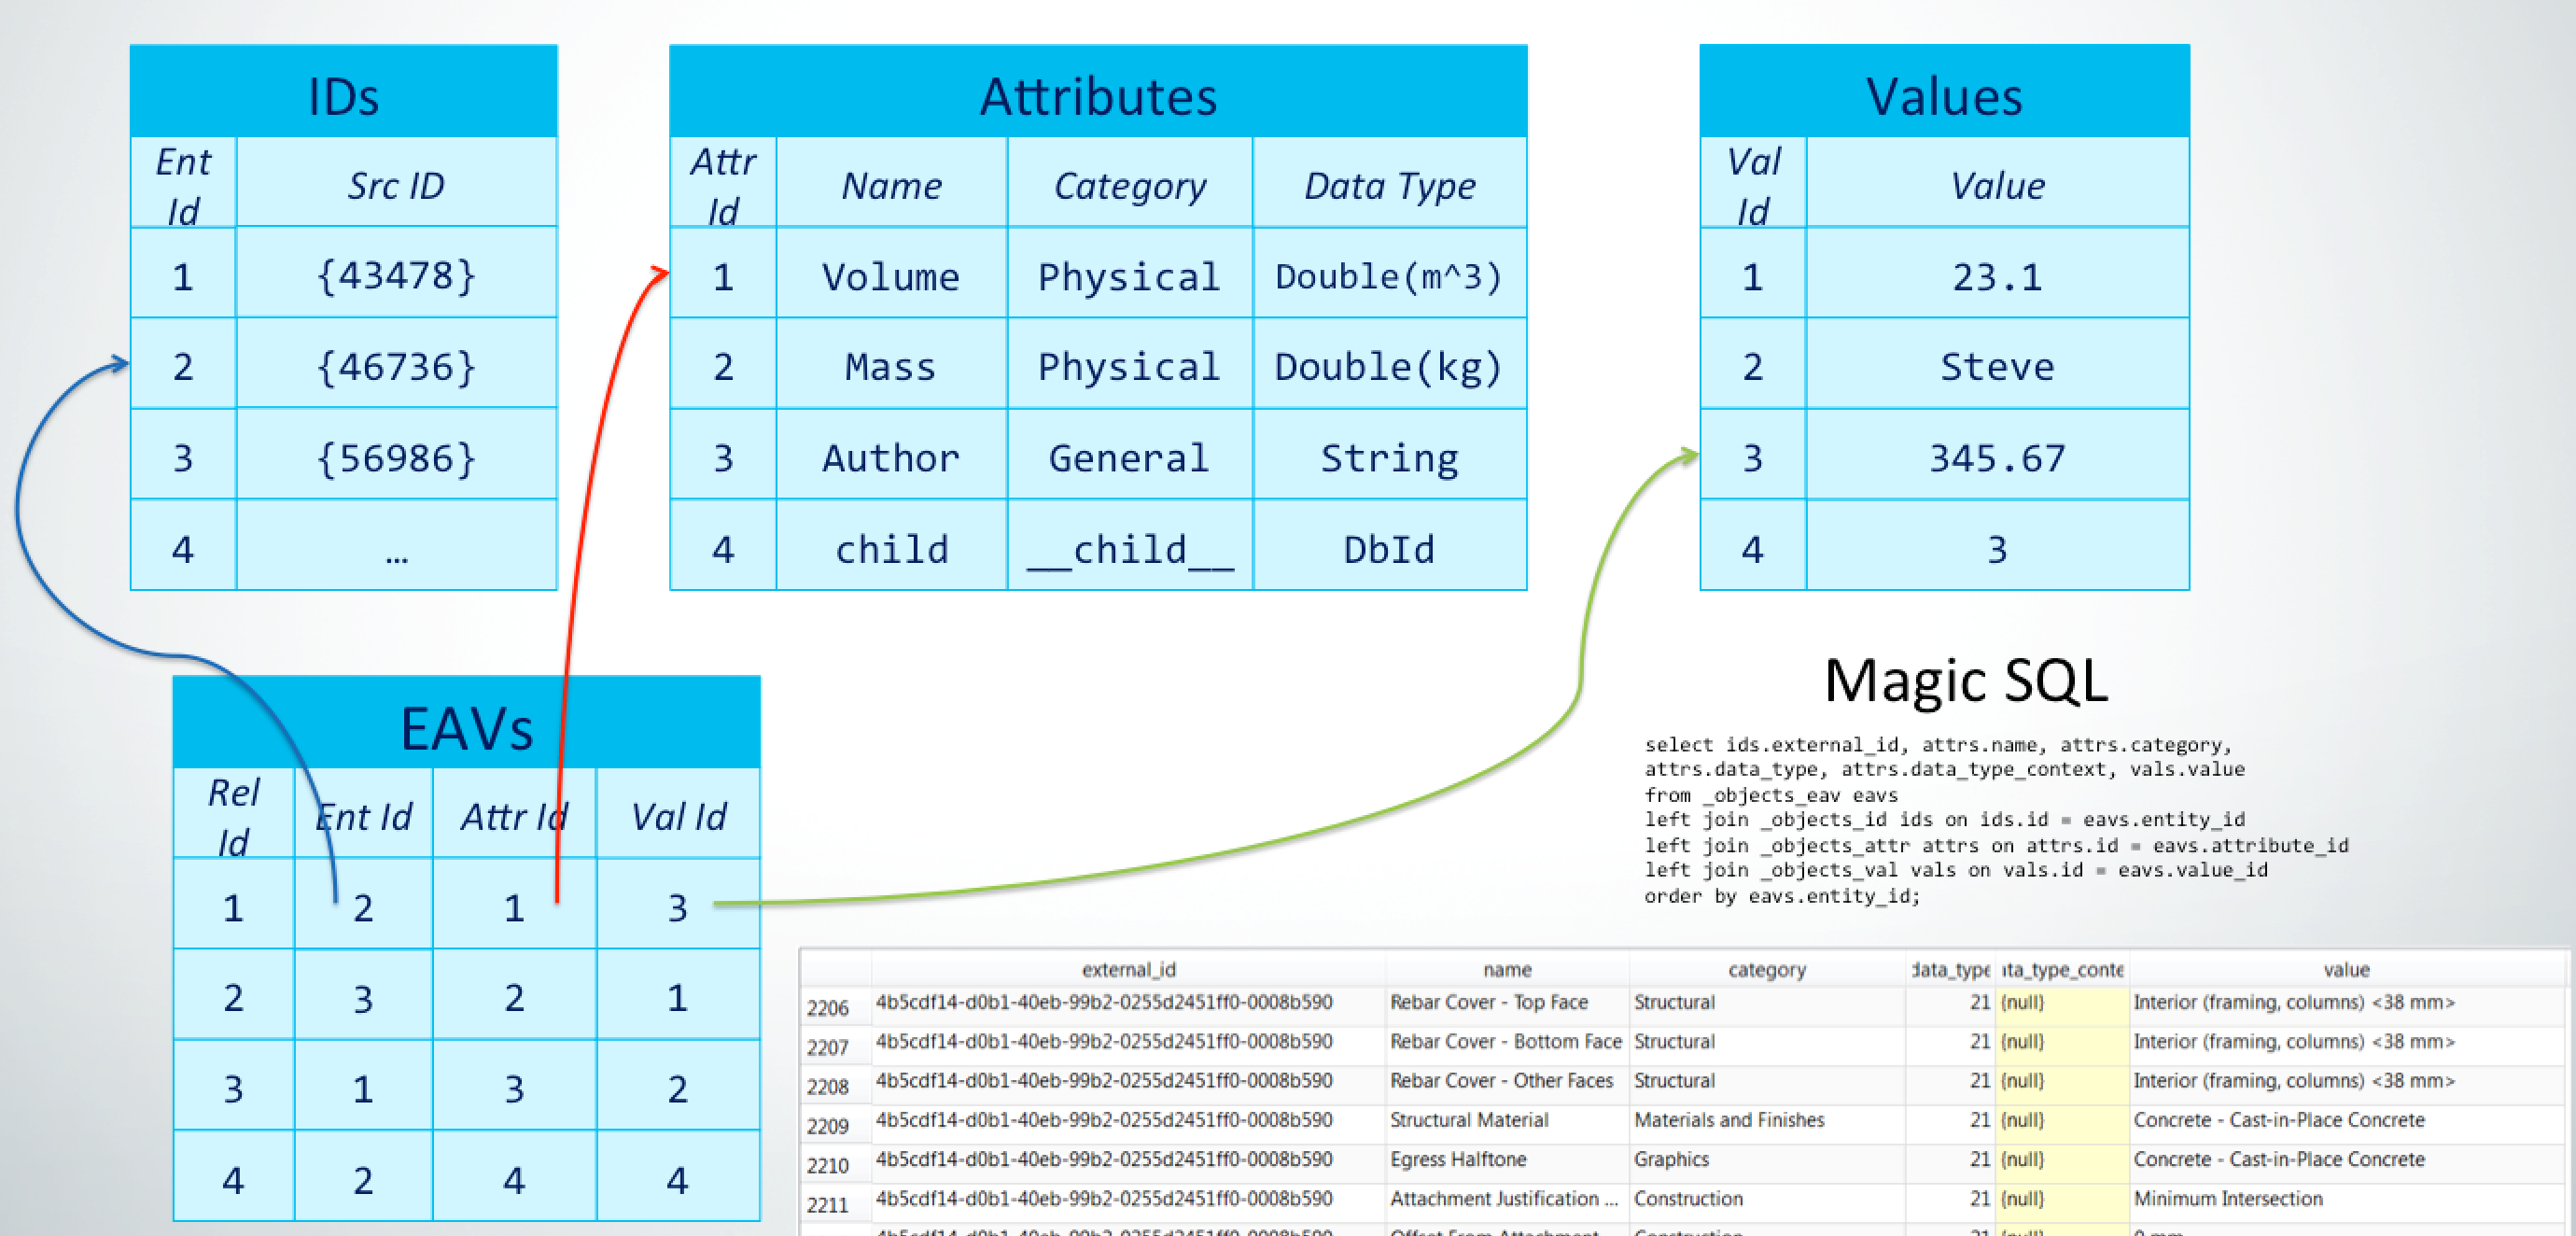

Tutorial : 
- https://github.com/petrbroz/forge-props-service
- https://aps.autodesk.com/blog/accessing-design-metadata-without-viewer

Tutorial : 
- https://github.com/petrbroz/forge-props-service
- https://aps.autodesk.com/blog/accessing-design-metadata-without-viewer

In [5]:
from aps_toolkit import DbReader
db = DbReader(URN, token)


In [6]:
db.db_path

'/opt/anaconda3/envs/aps-toolkit-dev311/lib/python3.11/site-packages/aps_toolkit/database/dXJuOmFkc2sud2lwcHJvZDpmcy5maWxlOnZmLnRfTFFVUDZoU3l5UXo5bm1sTE1FUHc_dmVyc2lvbj02.sdb'

### Object ID Reader

In [7]:
db.execute_query("SELECT * FROM _objects_id")

,id,external_id,viewable_id
0,1,doc_d14ee89f-34c9-4d58-ae27-c584f63353df,None
1,2,53c5330a-0a78-42d6-8dc2-cd7dde1d46b9-001522f7,None
2,3,53c5330a-0a78-42d6-8dc2-cd7dde1d46b9-001522f8,None
3,4,53c5330a-0a78-42d6-8dc2-cd7dde1d46b9-001522f9,None
4,5,53c5330a-0a78-42d6-8dc2-cd7dde1d46b9-001522fa,None
...,...,...,...
62668,62669,57ddb049-4112-4cf4-9243-c45c24903488,None
62669,62670,0bb0c17e-ba23-4d21-8b61-4f954bea6b74,None
62670,62671,77a4e6f2-95db-4050-9ff8-c2f5ee7b22a0,None
62671,62672,0c465578-969b-4809-ae2b-d28a73a43faf,None


### Object Attribute Reader

In [8]:
db.execute_query("SELECT * FROM _objects_attr")

,id,name,category,data_type,data_type_context,description,display_name,flags,display_precision,forge_parameter
0,1,name,__name__,20,None,None,None,0,0,None
1,2,child,__child__,11,None,None,None,1,0,None
2,3,parent,__parent__,11,None,None,None,1,0,None
3,4,instanceof_objid,__instanceof__,11,None,None,None,1,0,None
4,5,hastable,__hastable__,11,None,None,None,1,0,None
...,...,...,...,...,...,...,...,...,...,...
1333,1334,W1,Other,3,autodesk.unit.unit:millimeters-1.0.1,None,W1,8,1,None
1334,1335,Frame,Materials and Finishes,20,,None,Frame,0,0,None
1335,1336,Arrow Visibility,Other,1,,None,Arrow Visibility,0,0,None
1336,1337,Quantity,Text,20,,None,Quantity,0,0,None


### Object Value Reader

In [9]:
import pandas as pd
df = db.execute_query("SELECT * FROM _objects_val")
df.head(10)

,id,value
0,1,Model
1,2,rvt
2,3,1.0
3,4,1
4,5,Revit Document
5,6,Group
6,7,"Design, Engineering & Construction"
7,8,
8,9,Issue Date
9,10,Project Status


### Object EAV Reader

In [10]:
df = db.execute_query("SELECT * FROM _objects_eav")
df.head(10)

,id,entity_id,attribute_id,value_id
0,1,1,1,1
1,2,1,9,2
2,3,1,10,3
3,4,1,8,4
4,5,1,13,5
5,6,1,14,6
6,7,1,15,7
7,8,1,16,8
8,9,1,17,8
9,10,1,18,8


### Read SQLite file

In [11]:
# read sqlite file over all tables
db_file = db.db_path
try:
    # Connect to the SQLite database
    conn = sqlite3.connect(db_file)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    # Query the sqlite_master table to get the list of all tables
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

    # Fetch the results
    tables = cursor.fetchall()

    # Extract table names and print them
    for table in tables:
        print(table[0])

except sqlite3.Error as e:
    print(f"SQLite error: {e}")
finally:
    # Close the database connection when done
    conn.close()

_objects_id
_objects_attr
_objects_val
_objects_eav


In [12]:

# Define and execute the SQL query with JOIN statements
query = """
SELECT _objects_id.external_id AS externalId, _objects_attr.category AS category,_objects_attr.display_name, _objects_val.value
FROM _objects_id
JOIN _objects_eav ON _objects_id.id = _objects_eav.entity_id
JOIN _objects_attr ON _objects_eav.attribute_id = _objects_attr.id
JOIN _objects_val ON _objects_eav.value_id = _objects_val.id
WHERE category NOT LIKE '\_\_%\_\_' ESCAPE '\\' 
ORDER BY externalId;
"""
data = db.execute_query(query)
data.head(20)

,externalId,category,display_name,value
0,00c6c04a-12df-4dad-941f-b193ceb216ca-0000225e,Identity Data,Image,
1,00c6c04a-12df-4dad-941f-b193ceb216ca-0000225e,Identity Data,Keynote,
2,00c6c04a-12df-4dad-941f-b193ceb216ca-0000225e,IFC Parameters,Export to IFC,By Type
3,00c6c04a-12df-4dad-941f-b193ceb216ca-0000225e,IFC Parameters,Export to IFC As,
4,00c6c04a-12df-4dad-941f-b193ceb216ca-0000225e,IFC Parameters,IFC Predefined Type,
5,00c6c04a-12df-4dad-941f-b193ceb216ca-0000225e,IFC Parameters,IfcGUID,00ni1A4jzDhPGViPFEiZIK
6,00c6c04a-12df-4dad-941f-b193ceb216ca-0000225e,Identity Data,Model,
7,00c6c04a-12df-4dad-941f-b193ceb216ca-0000225e,Identity Data,Manufacturer,
8,00c6c04a-12df-4dad-941f-b193ceb216ca-0000225e,Identity Data,Comments,
9,00c6c04a-12df-4dad-941f-b193ceb216ca-0000225e,Identity Data,URL,


### Get All Categories

In [13]:
# Define and execute the SQL query with JOIN statements
query = """
SELECT _objects_id.external_id, _objects_attr.category,_objects_attr.display_name, _objects_val.value
FROM _objects_id
JOIN _objects_eav ON _objects_id.id = _objects_eav.entity_id
JOIN _objects_attr ON _objects_eav.attribute_id = _objects_attr.id
JOIN _objects_val ON _objects_eav.value_id = _objects_val.id
WHERE _objects_attr.name LIKE '_RC';
"""
df_categories = db.execute_query(query)
# get unique values from the category column
categories = df_categories['value'].unique()
# create a dataframe for categories
df_categories = pd.DataFrame(categories, columns=['category'])
df_categories.head(50)
df_categories.sort_values(by=['category'], inplace=True)
df_categories.head(10)

,category
0,
35,<Sketch>
53,Air Terminals
5,Area Schemes
43,Automatic Sketch Dimensions
19,Building Type Settings
14,Cameras
61,Center Line
54,Center line
17,Color Fill Schema


In [14]:
# Define and execute the SQL query with JOIN statements
query = """
SELECT _objects_id.external_id, _objects_attr.category,_objects_attr.display_name, _objects_val.value
FROM _objects_id
JOIN _objects_eav ON _objects_id.id = _objects_eav.entity_id
JOIN _objects_attr ON _objects_eav.attribute_id = _objects_attr.id
JOIN _objects_val ON _objects_eav.value_id = _objects_val.id
WHERE _objects_attr.name LIKE '_RC';
"""
df_categories = db.execute_query(query)
# get unique values from the category column
categories = df_categories['value'].unique()
categories

array(['', 'Materials', 'Elevations', 'Views', 'Primary Contours',
       'Area Schemes', 'Phases', 'Shared Site', 'Work Plane Grid',
       'Revision', 'Project Information', 'Structural Load Cases',
       'Sun Path', 'Internal Origin', 'Cameras', 'Section Boxes',
       'HVAC Zones', 'Color Fill Schema', 'HVAC Load Schedules',
       'Building Type Settings', 'Space Type Settings', 'Survey Point',
       'Project Base Point', 'Electrical Demand Factor Definitions',
       'Electrical Load Classifications',
       'Panel Schedule Templates - Branch Panel',
       'Panel Schedule Templates - Data Panel',
       'Panel Schedule Templates - Switchboard',
       'Electrical Load Classification Parameter Element',
       'Material Assets', 'Pipe Segments', 'Legend Components',
       'Generic Annotations', 'Lines', 'Detail Items', '<Sketch>',
       'Rooms', 'Spaces', 'Title Blocks', 'Schedules', 'Text Notes',
       'Dimensions', 'Constraints', 'Automatic Sketch Dimensions',
       'Revi

#### Read Query Database ElementId

In [15]:
query = """
SELECT _objects_id.id AS dbId, _objects_id.external_id AS externalId, 
                   _objects_attr.name AS name,_objects_attr.display_name AS propName , 
                   _objects_val.value AS propValue
            FROM _objects_eav
                INNER JOIN _objects_id ON _objects_eav.entity_id = _objects_id.id
                INNER JOIN _objects_attr ON _objects_eav.attribute_id = _objects_attr.id
                INNER JOIN _objects_val ON _objects_eav.value_id = _objects_val.id
            WHERE name = 'ElementId'
"""
db.execute_query(query)

,dbId,externalId,name,propName,propValue
0,218,e3e052f9-0156-11d5-9301-0000863f27ad-00000001,ElementId,None,1
1,219,e3e052f9-0156-11d5-9301-0000863f27ad-00000002,ElementId,None,2
2,220,e3e052f9-0156-11d5-9301-0000863f27ad-00000003,ElementId,None,3
3,221,e3e052f9-0156-11d5-9301-0000863f27ad-00000004,ElementId,None,4
4,222,e3e052f9-0156-11d5-9301-0000863f27ad-00000005,ElementId,None,5
...,...,...,...,...,...
62008,62650,18832dd6-50a9-411b-800e-c7629f07caae-00274b28,ElementId,None,2575144
62009,62651,18832dd6-50a9-411b-800e-c7629f07caae-00274b29,ElementId,None,2575145
62010,62652,18832dd6-50a9-411b-800e-c7629f07caae-00274b2a,ElementId,None,2575146
62011,62653,18832dd6-50a9-411b-800e-c7629f07caae-00274b2b,ElementId,None,2575147


#### Read Query Database By ExternalId

In [16]:
query = """
SELECT _objects_id.id AS dbId, _objects_id.external_id AS externalId, 
                _objects_attr.name AS name,_objects_attr.display_name AS propName , 
                _objects_val.value AS propValue
        FROM _objects_eav
            INNER JOIN _objects_id ON _objects_eav.entity_id = _objects_id.id
            INNER JOIN _objects_attr ON _objects_eav.attribute_id = _objects_attr.id
            INNER JOIN _objects_val ON _objects_eav.value_id = _objects_val.id
        WHERE externalId = '18832dd6-50a9-411b-800e-c7629f07caae-00274b2c'
"""
db.execute_query(query)

,dbId,externalId,name,propName,propValue
0,62654,18832dd6-50a9-411b-800e-c7629f07caae-00274b2c,ElementId,None,2575148
1,62654,18832dd6-50a9-411b-800e-c7629f07caae-00274b2c,name,None,LMV 1 [2575148]
2,62654,18832dd6-50a9-411b-800e-c7629f07caae-00274b2c,Category,None,Revit
3,62654,18832dd6-50a9-411b-800e-c7629f07caae-00274b2c,parent,None,217
4,62654,18832dd6-50a9-411b-800e-c7629f07caae-00274b2c,Workset,Workset,Phase Settings
5,62654,18832dd6-50a9-411b-800e-c7629f07caae-00274b2c,Edited by,Edited by,


#### Get All Public Property

In [17]:
query = """
SELECT ids.id AS dbid, attrs.category AS category, COALESCE(NULLIF(attrs.display_name, ''), 
      attrs.name) AS name, vals.value AS value
   FROM _objects_eav eav
   LEFT JOIN _objects_id ids ON ids.id = eav.entity_id
   LEFT JOIN _objects_attr attrs ON attrs.id = eav.attribute_id
   LEFT JOIN _objects_val vals on vals.id = eav.value_id
   WHERE category NOT LIKE '\\_\\_%\\_\\_' ESCAPE '\\' /* skip internal properties */
   ORDER BY dbid
"""
db.execute_query(query)

,dbid,category,name,value
0,1,Identity Data,Organization Name,Group
1,1,Identity Data,Organization Description,"Design, Engineering & Construction"
2,1,Identity Data,Building Name,
3,1,Identity Data,Author,
4,1,IFC Parameters,IfcSite GUID,
...,...,...,...,...
620323,62652,Identity Data,Edited by,
620324,62653,Identity Data,Workset,ex_M_DHVAC_FA
620325,62653,Identity Data,Edited by,
620326,62654,Identity Data,Workset,Phase Settings


#### Read Query Database By Revit Category

In [18]:
query = """
SELECT _objects_id.id AS dbId, _objects_id.external_id AS externalId,
            _objects_attr.name AS name,_objects_attr.display_name AS propName , 
            _objects_val.value AS propValue
    FROM _objects_eav
        INNER JOIN _objects_id ON _objects_eav.entity_id = _objects_id.id
        INNER JOIN _objects_attr ON _objects_eav.attribute_id = _objects_attr.id
        INNER JOIN _objects_val ON _objects_eav.value_id = _objects_val.id
    WHERE name LIKE '_RC' ESCAPE '\\'
"""
db.execute_query(query)

,dbId,externalId,name,propName,propValue
0,217,d03f1e0d-de7e-428d-9f42-c7b55825fdef,_RC,None,
1,227,a75f4184-f9d2-4422-88a1-44f23a8d2fd3,_RC,None,Materials
2,541,248cc18a-b3fb-4981-a616-8736982fc9be,_RC,None,Elevations
3,542,b3b30cb3-81cd-42b4-8c93-b54e92cfacee,_RC,None,Elevations
4,544,8764c510-57b7-44c3-bddf-266d86c26380-0000c195,_RC,None,Elevations
...,...,...,...,...,...
281,62373,8d25b1c9-9b64-4dcb-9d6d-df623a9a29ea,_RC,None,Duct Fittings
282,62375,43cda1c7-995c-4852-9224-cbe3b40c976f-00128080,_RC,None,Duct Fittings
283,62429,1bdb91b8-7e41-41e1-9ce3-265be1e23e56,_RC,None,Air Terminals
284,62431,220acf94-3a96-4929-9399-72cbcd61d363-0027123c,_RC,None,Air Terminals


Congratulations! You have been done with challenge access to the database APS and make a query to get the element by its Id, ExternalId, and Revit Category. Now, let's explore next challenge.